# **1. Carga de importaciones y Data set**

In [ ]:
#---- Importaciones necesarias ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

#---- Metricas de modelos de clasificacion ----

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#----  Curva ROC y PR ----

from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve

#---- Importaciones para el modelo de random forest Classification ----

from sklearn.ensemble import RandomForestClassifier

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV

#---- Para el balanceo de datos ----
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-4-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


# **2.Preparcion de datos**

## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**



* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding


In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-13-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-13-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


- limitar las rondas que sean mayores 30 rondas

# **3. Modelo RandomForest Classifiacation**

### Conceptos basicos del modelo de Random  Forest

- Crearemos particiones o nodos en la - que se separaran de manera condicional.
- Nodo inicial: llamado es llamado raíz (root)

- Nodos internos: dividen los datos basandose en codiciones > o <. Pueden tener hijos o mas.

- Hojas: Donde no hay mas particiones


RandomForestClassifier scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Ingreso de las caracteristicas

In [ ]:

df_backup['RoundKills'].unique()

array([0, 3, 2, 1, 4, 5])

In [ ]:

X = df_backup[['MatchKills','MatchAssists','MatchHeadshots','RoundStartingEquipmentValue','RNonLethalGrenadesThrown','Team','Map']]
y = df_backup[['RoundWinner']]





### Separación de los datos: entrenamiento y prueba

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)


### Creación del Modelo Random forest Classifier

In [ ]:

model = RandomForestClassifier(

    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2.8},
    random_state=42,
    n_jobs=-1
) # a entrenar
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight={0: 1, 1: 2.8}, n_jobs=-1, random_state=42)

### Realizando predicciones

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



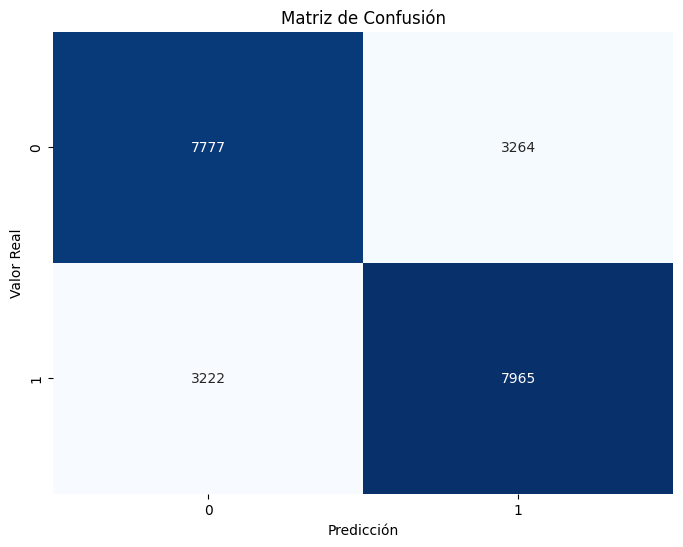

In [ ]:

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     11041
           1       0.71      0.71      0.71     11187

    accuracy                           0.71     22228
   macro avg       0.71      0.71      0.71     22228
weighted avg       0.71      0.71      0.71     22228

Accuracy Score: 0.7082058664747166


### Evaluación del modelo

### Calculando Sensitivity Y Specificity

In [ ]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

# Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.7140
Specificity: 0.7052


### Curva ROC

El valor de roc cuanto más cerca de 1, mejor. si fuera 0.5 daría igual que fuesen valores aleatorios y sería un mal modelo

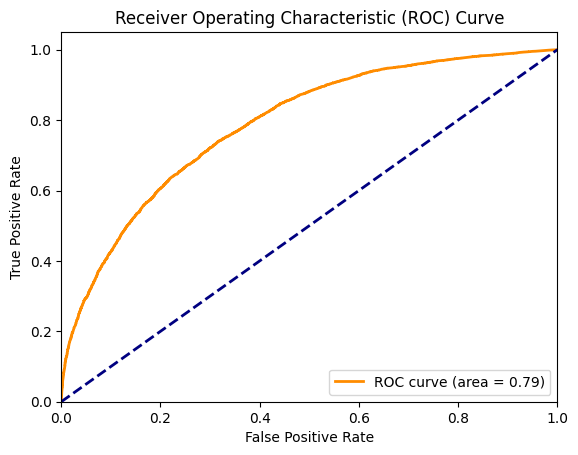

In [ ]:
# Calculate predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Curva PR

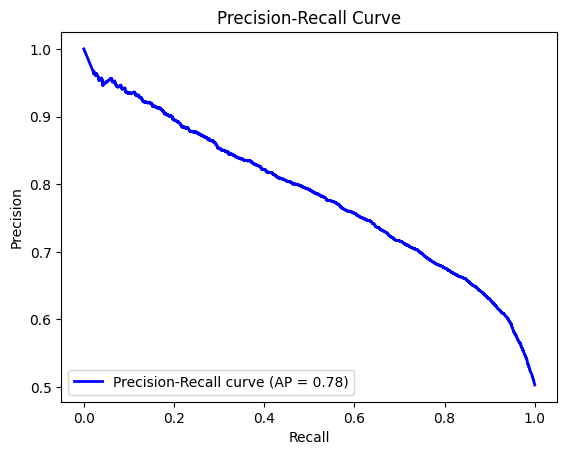

In [ ]:
# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### Grafico de experimento (ignorar)

/tmp/ipython-input-25-3927703129.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='viridis')


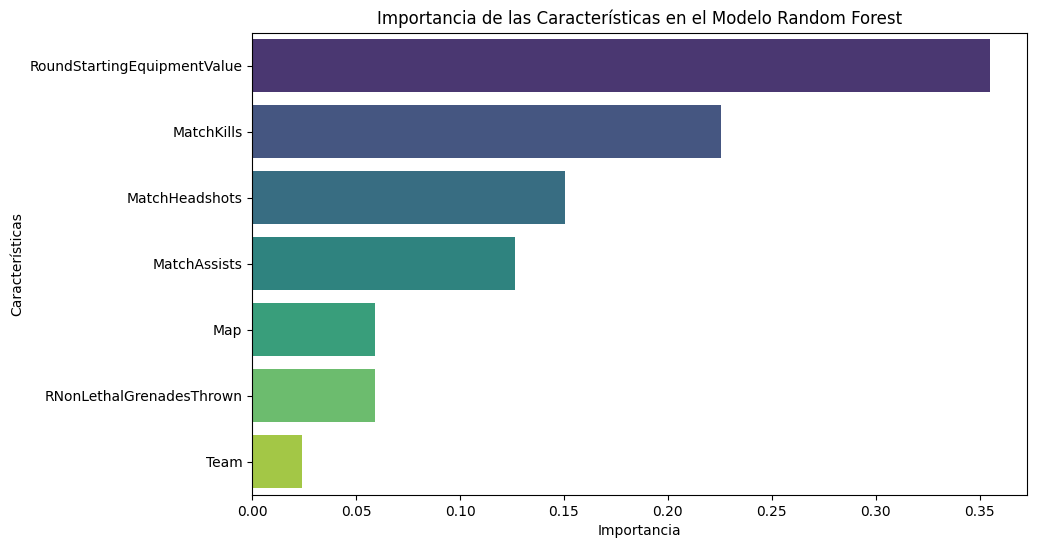

In [ ]:
feature_importances = model.feature_importances_

# Get the names of the features used in the model
features = X_train.columns

# Create a pandas Series to easily sort the importances
importance_series = pd.Series(feature_importances, index=features)

# Sort the features by importance
sorted_importance = importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='viridis')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# **Uso de GridsearchCV**

In [ ]:
param_grid = {
    'n_estimators': [108, 200],
    'class_weight': ['balanced', {0:1, 1:2.2}, {0:1, 1:2.4}, {0:1, 1:2.6}],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Get the best model
best_grid = grid_search.best_estimator_

# Make predictions with the best model
grid_predictions = best_grid.predict(X_test)

# Evaluate the best model
print("\nMatriz de Confusión (Grid Search):")
print(confusion_matrix(y_test, grid_predictions))

print("\nReporte de Clasificación (Grid Search):")
print(classification_report(y_test, grid_predictions))

print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, grid_predictions))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores parámetros: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Matriz de Confusión (Grid Search):
[[8239 2802]
 [3479 7708]]

Reporte de Clasificación (Grid Search):
              precision    recall  f1-score   support

           0       0.70      0.75      0.72     11041
           1       0.73      0.69      0.71     11187

    accuracy                           0.72     22228
   macro avg       0.72      0.72      0.72     22228
weighted avg       0.72      0.72      0.72     22228


Accuracy Score (Grid Search):
0.7174284685981644


### Calculo de Sensitivity y Specificity con gridsearchcv

In [ ]:
cm_best = confusion_matrix(y_test, y_pred)
tn_best, fp_best, fn_best, tp_best = cm_best.ravel()

sensitivity_best = tp_best / (tp_best + fn_best)
specificity_best = tn_best / (tn_best + fp_best)

print("\nMétricas del mejor modelo de GridSearchCV:")
print(f"Sensitivity: {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")


Métricas del mejor modelo de GridSearchCV:
Sensitivity: 0.7140
Specificity: 0.7052


### Curva ROC y curva PR usando el modelo de gridsearchCV

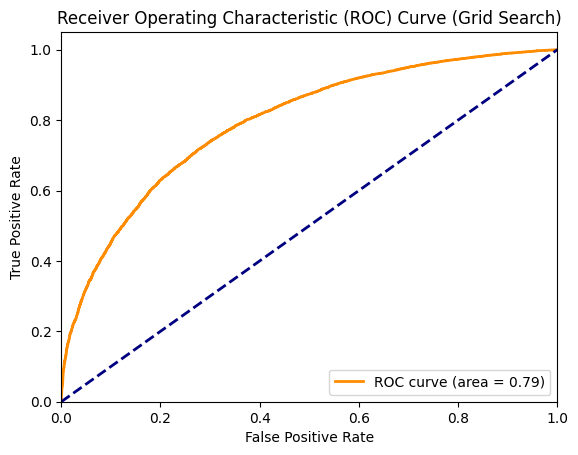

 -


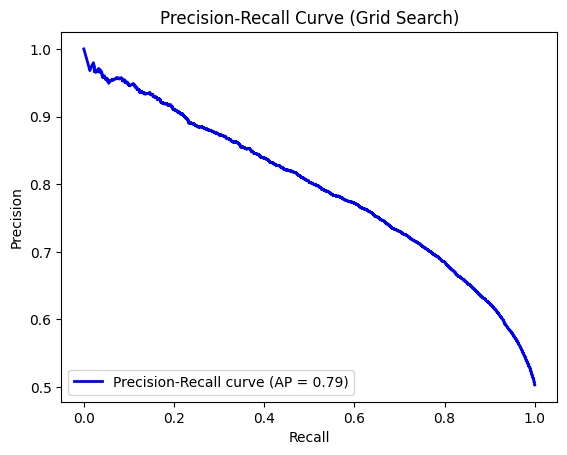

In [ ]:
grid_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Calculate ROC curve using the best model
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, grid_pred_proba)

# Calculate AUC (Area Under the Curve) using the best model
roc_auc_grid = auc(fpr_grid, tpr_grid)

# Plot the ROC curve for the best model
plt.figure()
plt.plot(fpr_grid, tpr_grid, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_grid)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Grid Search)')
plt.legend(loc="lower right")
plt.show()

# Calculate precision and recall for different thresholds using the best model
precision_grid, recall_grid, _ = precision_recall_curve(y_test, grid_pred_proba)

# Calculate the average precision score using the best model
average_precision_grid = average_precision_score(y_test, grid_pred_proba)
print(" -")
# Plot the Precision-Recall curve for the best model
plt.figure()
plt.plot(recall_grid, precision_grid, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_grid)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Grid Search)')
plt.legend(loc="lower left")
plt.show()

### Predicciones con el mejor modelo de GridsearchCV

In [ ]:
best_grid = grid_search.best_estimator_
grid_predictions = best_grid.predict(X_test)

# Conclusión

-Este quinto modelo muestra un rendimiento excelente y balanceado: tanto la clase 0 como la clase 1 tienen precisión, recall y F1-score iguales o muy similares (todos en 0.71), lo que indica que el modelo clasifica ambas clases con la misma eficacia; el accuracy es de 70.8%, y el macro y weighted F1-score también son de 0.71, lo que confirma un rendimiento parejo, sin sesgo hacia ninguna clase.
En resumen, este modelo es el más confiable y equilibrado hasta ahora, ideal para problemas donde ambas clases son igualmente importantes.


.

Este modelo ajustado con GridSearchCV presenta un rendimiento muy sólido y bien balanceado:

- La clase 0 alcanza precisión de 0.70 y recall de 0.75.

- La clase 1 obtiene precisión de 0.73 y recall de 0.69.

Ambas clases tienen F1-scores similares (0.72 y 0.71), lo que demuestra un ligero intercambio entre sensibilidad y precisión, pero con equilibrio general.
El accuracy es de 71.7%, y tanto el macro como el weighted F1-score son de 0.72, lo que indica un modelo consistente, sin sesgo marcado.

En resumen: este modelo ajustado por GridSearchCV es muy confiable, equilibrado y ligeramente superior al anterior en términos de rendimiento global. Ideal para producción.